In [1]:
pip install opencv-python numpy


aspect_ratio=  1.9655172413793103
aspect_ratio=  1.9401709401709402
aspect_ratio=  1.9401709401709402


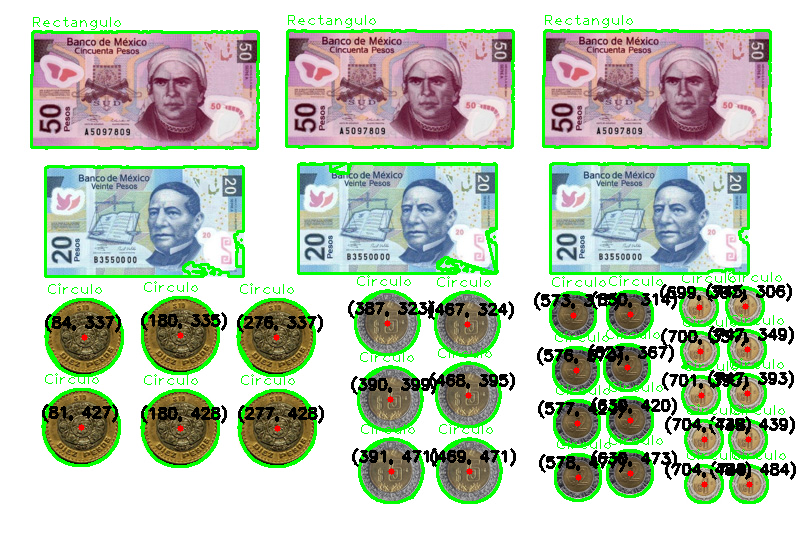

Circles: [{'center_x': 749, 'center_y': 484, 'radius': 19}, {'center_x': 704, 'center_y': 484, 'radius': 19}, {'center_x': 578, 'center_y': 477, 'radius': 23}, {'center_x': 630, 'center_y': 473, 'radius': 23}, {'center_x': 469, 'center_y': 471, 'radius': 32}, {'center_x': 391, 'center_y': 471, 'radius': 32}, {'center_x': 748, 'center_y': 439, 'radius': 19}, {'center_x': 704, 'center_y': 439, 'radius': 19}, {'center_x': 577, 'center_y': 423, 'radius': 23}, {'center_x': 630, 'center_y': 420, 'radius': 23}, {'center_x': 277, 'center_y': 428, 'radius': 38}, {'center_x': 180, 'center_y': 428, 'radius': 38}, {'center_x': 81, 'center_y': 427, 'radius': 38}, {'center_x': 701, 'center_y': 395, 'radius': 19}, {'center_x': 747, 'center_y': 393, 'radius': 19}, {'center_x': 390, 'center_y': 399, 'radius': 32}, {'center_x': 468, 'center_y': 395, 'radius': 32}, {'center_x': 576, 'center_y': 370, 'radius': 23}, {'center_x': 627, 'center_y': 367, 'radius': 23}, {'center_x': 700, 'center_y': 351, 'radiu

In [3]:
#Importar bibliotecas necesarias
import numpy as np
from google.colab.patches import cv2_imshow  #Para mostrar imágenes en Google Colab
import cv2  #OpenCV para procesamiento de imágenes

#Cargar la imagen desde un archivo
image = cv2.imread('/content/uploads_recortable-billetes-y-monedas.jpg')

#Obtener dimensiones de la imagen
height, width, channels = image.shape

#Imprimir las dimensiones de la imagen
#print(f"Dimensiones de la imagen: Altura = {height}, Ancho = {width}, Canales = {channels}")

#Convertir la imagen a escala de grises
gray = cv2.cvtColor(image, cv2.COLOR_BGR2GRAY)

#Aplicar detección de bordes con el algoritmo de Canny
canny = cv2.Canny(gray, 10, 150)
canny = cv2.dilate(canny, None, iterations=1)  #Dilatar los bordes
canny = cv2.erode(canny, None, iterations=1)   #Erosionar para eliminar pequeños detalles

#Encontrar contornos en la imagen
cnts, _ = cv2.findContours(canny, cv2.RETR_EXTERNAL, cv2.CHAIN_APPROX_SIMPLE)

#Dibujar los contornos en la imagen original
cv2.drawContours(image, cnts, -1, (0, 255, 0), 2)

#Dimensiones de la imagen
height, width = image.shape[:2]

#Agregar un eje de coordenadas a la esquina inferior izquierda
#cv2.line(image, (0, height), (width, height), (255, 0, 0), 1)  # Eje X
#cv2.line(image, (0, 0), (0, height), (255, 0, 0), 1)  # Eje Y

#Inicializar listas para almacenar información sobre círculos y rectángulos
circles = []
rectangles = []

#Iterar a través de los contornos encontrados
for c in cnts:
    #Aproximar el contorno segun vertices
    epsilon = 0.01 * cv2.arcLength(c, True) ## se calula el perimetro del contorno
    approx = cv2.approxPolyDP(c, epsilon, True) #se aproxima curvas de cada contorno, el tercer parametro confirma que es un poligono cerrado.
    x, y, w, h = cv2.boundingRect(approx) #se usa x,y para la esquina superior de los rectangulos
    ##se usa w y h como altura y ancho del rectangulo


    if len(approx) == 3: ##Si el poligono tiene 3 vertices
      ##Parametros usados para identificar el triangulo en la imagen:
        #Texto que se agrega, coordenadas de texto, fuente,etc.
        cv2.putText(image, 'Triangulo', (x, y - 5), 1, 1, (0, 255, 0), 1)

    if len(approx) == 4:
        aspect_ratio = float(w) / h
        print('aspect_ratio= ', aspect_ratio)
        if aspect_ratio == 1:
          ##Parametros usados para identificar el cuadrado en la imagen:
        #Texto que se agrega, coordenadas de texto, fuente,etc.
            cv2.putText(image, 'Cuadrado', (x, y - 5), 1, 1, (0, 255, 0), 1)
            ##Se agrega las coordenadas del cuadrado a la lista rectangulos
            rectangles.append({'x': x, 'y': y, 'width': w, 'height': h})

        else:
          ##Parametros usados para identificar el rectangulo en la imagen:
        #Texto que se agrega, coordenadas de texto, fuente,etc.
            cv2.putText(image, 'Rectangulo', (x, y - 5), 1, 1, (0, 255, 0), 1)
            ##Se agrega las coordenadas del cuadrado a la lista rectangulos
            rectangles.append({'x': x, 'y': y, 'width': w, 'height': h})

    if len(approx) > 10:  #Si el poligono tiene mas de 10 vertices se considera circulo
       ##Datos del circulo
        area = cv2.contourArea(c)
        perimeter = cv2.arcLength(c, True)
        ##Ajuste del circulo para poder incluirlo a la lista
        circularity = 4 * np.pi * (area / (perimeter * perimeter))
        if circularity > 0.5:
            cv2.putText(image, 'Circulo', (x, y - 5), 1, 1, (0, 255, 0), 1)
            #Agregar información del círculo a la lista
            center_x = int(x + w / 2)
            center_y = int(y + h / 2)
            radius = int(max(w, h) / 2)
            circles.append({'center_x': center_x, 'center_y': center_y, 'radius': radius})

        #Dibujar el contorno y el centro del objeto para referencias
        cv2.drawContours(image, [approx], 0, (0, 255, 0), 2)
        cv2.putText(image, f'({center_x}, {center_y})', (center_x - 40, center_y - 10), cv2.FONT_HERSHEY_SIMPLEX, 0.5,
                    (0, 0, 0), 2)
        cv2.circle(image, (center_x, center_y), 3, (0, 0, 255), -1)

# Mostrar la imagen con los contornos, el eje de coordenadas y las coordenadas de los centros
cv2_imshow(image)

# Imprimir la información sobre círculos y rectángulos
print("Circles:", circles)
print("Rectangles:", rectangles)


Circles: [{'center_x': 749, 'center_y': 484, 'radius': 19}, {'center_x': 704, 'center_y': 484, 'radius': 19}, {'center_x': 578, 'center_y': 477, 'radius': 23}, {'center_x': 630, 'center_y': 473, 'radius': 23}, {'center_x': 469, 'center_y': 471, 'radius': 32}, {'center_x': 391, 'center_y': 471, 'radius': 32}, {'center_x': 748, 'center_y': 439, 'radius': 19}, {'center_x': 704, 'center_y': 439, 'radius': 19}, {'center_x': 577, 'center_y': 423, 'radius': 23}, {'center_x': 630, 'center_y': 420, 'radius': 23}, {'center_x': 277, 'center_y': 428, 'radius': 38}, {'center_x': 180, 'center_y': 428, 'radius': 38}, {'center_x': 81, 'center_y': 427, 'radius': 38}, {'center_x': 701, 'center_y': 395, 'radius': 19}, {'center_x': 747, 'center_y': 393, 'radius': 19}, {'center_x': 390, 'center_y': 399, 'radius': 32}, {'center_x': 468, 'center_y': 395, 'radius': 32}, {'center_x': 576, 'center_y': 370, 'radius': 23}, {'center_x': 627, 'center_y': 367, 'radius': 23}, {'center_x': 700, 'center_y': 351, 'radiu